<a href="https://colab.research.google.com/github/mordiouf/Projet-Analyse/blob/main/Mor_Diouf_Projet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [44]:
import os

In [45]:
os.listdir()

['.config', 'sample_data']

In [46]:
os.listdir('/gdrive/MyDrive/Data')

['dataset_diabetes_diabetic_data.csv',
 'insuffisants cardiaques.csv',
 'Credit .csv']

**Importation de librairies**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

**Importation de la base de donnees credit**

In [6]:
donnees =  pd.read_csv('/gdrive/MyDrive/Data/Credit .csv')
donnees.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


On souhaite expliquer la variable **Balance** par rapport aux autres variables

**Description des donnees**

In [7]:
print('lignes  : ',donnees.shape[0]) # Nombre de lignes
print('colonnes : ',donnees.shape[1]) # Nombre de colonnes
print('\nVariables  : \n',donnees.columns.tolist()) # All features
print('\nvaleurs nulles  : \n',donnees.isnull().sum().values.sum()) # Les Valeus manquantes
print('\nvaleurs uniques : \n',donnees.nunique()) # Les Variables qui ne se repetent pas
print('\nQuelques infos : \n',donnees.info()) # Informations sur les types de variables

lignes  :  400
colonnes :  11

Variables  : 
 ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Own', 'Student', 'Married', 'Region', 'Balance']

valeurs nulles  : 
 0

valeurs uniques : 
 Income       399
Limit        387
Rating       283
Cards          9
Age           68
Education     16
Own            2
Student        2
Married        2
Region         3
Balance      284
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    

On voit que les variables **Own**, **Student**, **Married**, **Region** sont de types "object" : On doit faire l'encodage pour pouvoir partitionner les données.

**Encodage des variables qualitatives en Numérique**

In [8]:
code = {'Yes':1,
        'No':0,
        'South':1,
        'West':2,
        'East':3}

In [9]:
for col in donnees.select_dtypes('object'):
    donnees[col] = donnees[col].map(code)

donnees

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,0,0,1,1,333
1,106.025,6645,483,3,82,15,1,1,1,2,903
2,104.593,7075,514,4,71,11,0,0,0,2,580
3,148.924,9504,681,3,36,11,1,0,0,2,964
4,55.882,4897,357,2,68,16,0,0,1,1,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,0,0,1,1,560
396,13.364,3838,296,5,65,17,0,0,0,3,480
397,57.872,4171,321,5,67,12,1,0,1,1,138
398,37.728,2525,192,1,44,13,0,0,1,1,0


In [10]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    int64  
 7   Student    400 non-null    int64  
 8   Married    400 non-null    int64  
 9   Region     400 non-null    int64  
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


#**Statistique Descriptive de nos Données**

In [11]:
donnees.describe()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.517500,0.100000,0.61250,1.75000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.500319,0.300376,0.48779,0.82717,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.00000,1.00000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000,0.000000,0.00000,1.00000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,1.000000,0.000000,1.00000,2.00000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.000000,0.000000,1.00000,2.00000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000,1.000000,1.00000,3.00000,1999.000000


**Matrice de Corrélation**

<ipython-input-12-7b72def3e2fb>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(donnees.corr(), dtype=np.bool)


(11.7, -0.7)

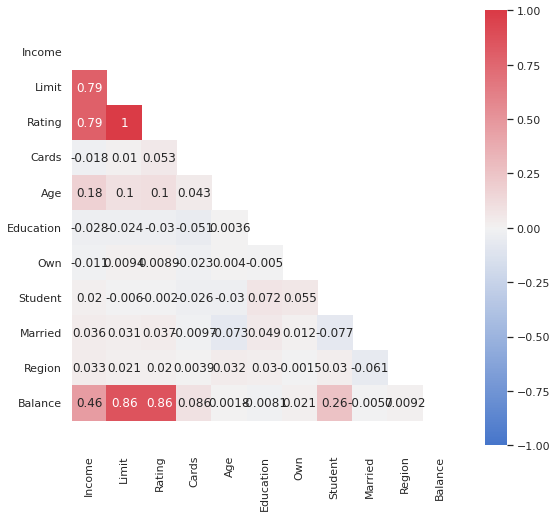

In [12]:
# visualisation de la matrice de corrélation
sns.set(style="white")
# Générer un masque pour le triangle supérieur
mask = np.zeros_like(donnees.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Configurez la figure matplotlib pour contrôler la taille de la carte thermique
fig, ax = plt.subplots(figsize=(10,8))
# Créer une palette de couleurs personnalisée
cmap = sns.diverging_palette(255, 10, as_cmap=True)
# Tracer la carte thermique
sns.heatmap(donnees.corr(), mask=mask, annot=True, square=True, cmap=cmap, vmin=-1, vmax=1, ax=ax)
# Empêcher le problème de coupure de Heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.7, top-0.7)

On voit que la variable **Balance** est corrélé faiblement avec **Income** et **Student** mais fortement corrélé avec **Limit** et **Rating**

**Partitionnement des donnees**

In [77]:
from sklearn.model_selection import train_test_split

x, Y = donnees.drop('Balance', axis=1), donnees['Balance']

#On ajoute une colonne cpmpose de 1 : cela nous permettra d'avoir l'intercept 
X=pd.concat([pd.DataFrame(np.ones((x.shape[0],1))),x],axis=1)
X

,0,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region
0,1.0,14.891,3606,283,2,34,11,0,0,1,1
1,1.0,106.025,6645,483,3,82,15,1,1,1,2
2,1.0,104.593,7075,514,4,71,11,0,0,0,2
3,1.0,148.924,9504,681,3,36,11,1,0,0,2
4,1.0,55.882,4897,357,2,68,16,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,12.096,4100,307,3,32,13,0,0,1,1
396,1.0,13.364,3838,296,5,65,17,0,0,0,3
397,1.0,57.872,4171,321,5,67,12,1,0,1,1
398,1.0,37.728,2525,192,1,44,13,0,0,1,1


In [78]:
# verification des tailles
print(X.shape)
print(Y.shape)

(400, 11)
(400,)


Une fonction regression(X, Y) qui renvoie l’estimateur des moindre carrés

In [79]:
def  regression(X, Y):
    #La Transpose de X
    t = np.transpose(X)
    # Le Produit Scalaire entre X et sa transpose
    b = np.dot(t,X)
    #L'inverse de du produit scalaire
    inv = np.linalg.pinv(b)
    #Le Produit Scalaire de l'inverse et la transpose
    c = np.dot(inv,t)
    beta = np.dot(c,Y)
    
    return beta

In [80]:
regr = regression(X, Y)
coef = regr
#intercept = regr[0]
print("Alpha_Esti:",coef)
#print("Beta_Esti:",intercept)

Alpha_Esti: [-4.62093319e+02 -7.79830707e+00  1.93187595e-01  1.10038940e+00
  1.79451452e+01 -6.30428572e-01 -1.08195299e+00 -1.04152508e+01
  4.26727316e+02 -7.41212465e+00 -3.92077141e+00]


**Regression Lineaire avec sklearn pour ensuite faire la comparaison**

In [81]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,Y)
print("Alpha_Esti:",reg.coef_)
print("Beta_Esti:",reg.intercept_)

Alpha_Esti: [ 0.00000000e+00 -7.79830707e+00  1.93187595e-01  1.10038940e+00
  1.79451452e+01 -6.30428572e-01 -1.08195299e+00 -1.04152508e+01
  4.26727316e+02 -7.41212465e+00 -3.92077141e+00]
Beta_Esti: -462.09331881680714


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


**Comparaison:** On remarque que les resultats de la fonction regression() sont les memes que celles de la régresseur de type
linear_model.LinearRegression

# On récupère l'erreur de norme 2 sur le jeu de données comme baseline

In [82]:
baseline_error = np.mean((reg.predict(X) - Y) ** 2)

print(baseline_error)

9491.619181932065


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Une fonction qui renvoie le vecteur Yˆ des étiquettes prédites

In [83]:
def  regress(X, α, β):
    Yp = np.dot(α,X) + β
    
    return Yp

In [84]:
Ypr = regress(X, reg.intercept_, reg.coef_)
Ypr

array([[-4.62093319e+02, -6.88882992e+03, -1.66630831e+06, ...,
         4.26727316e+02, -4.69505443e+02, -4.66014090e+02],
       [-4.62093319e+02, -4.90012424e+04, -3.07060991e+06, ...,
        -3.53660026e+01, -4.69505443e+02, -9.28107409e+02],
       [-4.62093319e+02, -4.83395248e+04, -3.26931004e+06, ...,
         4.26727316e+02, -7.41212465e+00, -9.28107409e+02],
       ...,
       [-4.62093319e+02, -2.67500629e+04, -1.92739104e+06, ...,
         4.26727316e+02, -4.69505443e+02, -4.66014090e+02],
       [-4.62093319e+02, -1.74416550e+04, -1.16678544e+06, ...,
         4.26727316e+02, -4.69505443e+02, -4.66014090e+02],
       [-4.62093319e+02, -8.64940546e+03, -2.55260330e+06, ...,
         4.26727316e+02, -7.41212465e+00, -9.28107409e+02]])

#L’erreur au sens des moindres carrés du régresseur appris sur l’ensemble du jeu de données Credit. 

In [89]:
baseline_error = np.mean((reg.predict(X) - Y) ** 2)

#print(baseline_error)
baseline_error

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


9491.619181932065

In [87]:
# Calculons l'erreur
y = sum(Y,-Ypr)
yt = np.transpose(y)
e = np.dot(yt,y)
e

array([[1.73835784e+13, 1.90881010e+13, 1.99820414e+14, 3.10217452e+13,
        1.74575097e+13, 1.94901165e+13, 1.78634005e+13, 1.73658549e+13,
        1.73133153e+13, 1.73692650e+13, 1.74128048e+13],
       [1.90881010e+13, 2.10655884e+13, 2.24903468e+14, 3.44312132e+13,
        1.91692064e+13, 2.14102749e+13, 1.96147116e+13, 1.90686235e+13,
        1.90109662e+13, 1.90724364e+13, 1.91202749e+13],
       [1.99820414e+14, 2.24903468e+14, 2.75081112e+15, 3.86920515e+14,
        2.00672997e+14, 2.24376845e+14, 2.05321391e+14, 1.99617610e+14,
        1.99012400e+14, 1.99658874e+14, 2.00159755e+14],
       [3.10217452e+13, 3.44312132e+13, 3.86920515e+14, 5.73992583e+13,
        3.11546413e+13, 3.48044122e+13, 3.18767670e+13, 3.09901754e+13,
        3.08963498e+13, 3.09964388e+13, 3.10741223e+13],
       [1.74575097e+13, 1.91692064e+13, 2.00672997e+14, 3.11546413e+13,
        1.75319157e+13, 1.95730934e+13, 1.79393539e+13, 1.74397095e+13,
        1.73869469e+13, 1.74431349e+13, 1.74868608e+

**Application de la régression ridge**

Une Fonction de la regression Ridge qui renvoie l’estimateur des
moindre carrés généralisés.

In [91]:
def ridge_regression(X, Y , lamb):
    t = np.transpose(X)
    b = np.dot(t,X)
    I = np.ones((11,11))
    k = b + lamb*I
    inv = np.linalg.pinv(k)
    c = np.dot(inv,t)
    beta = np.dot(c,Y)
    
    return beta

In [92]:
regridge = ridge_regression(X, Y, 1)
print("Alpha_Esti:",regridge)
print("Beta_Esti:",regridge[0])

Alpha_Esti: [-4.57592720e+02 -7.79325273e+00  1.95425184e-01  1.06470957e+00
  1.80160480e+01 -6.47287726e-01 -1.23494057e+00 -1.02522472e+01
  4.27941312e+02 -7.11749238e+00 -4.01072525e+00]
Beta_Esti: -457.5927199626169


In [93]:
from sklearn import linear_model
regr = linear_model.Ridge()
regr.fit(X,Y)
print("Alpha_Esti:",regr.coef_)
print("Beta_Esti:",regr.intercept_)

Alpha_Esti: [ 0.00000000e+00 -7.79113238e+00  1.90943057e-01  1.13273916e+00
  1.77188671e+01 -6.39549660e-01 -9.88984320e-01 -9.91284338e+00
  4.14873848e+02 -8.00749312e+00 -3.80262618e+00]
Beta_Esti: -462.2609404218896


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


**Comparaison:** On remarque que les resultats de la fonction ridge_regression() sont les memes que celles de la régresseur de type
linear_model.Ridge

L’évolution des coefficients du vecteur αˆ en fonction du paramètre de régularisation
lambda pour des valeurs entre 0.001 et 1000.

On doit trouver un coefficient de régularisation adapté. Pour rappel, l'objectif est de biaiser un peu la prédiction, afin de diminuer l'erreur standard. 

On appelle ce coefficient alpha, on va en tester un certain nombre afin de trouver celui qui est optimal

In [95]:
n_alphas = 400
alphas = np.logspace(-6, 6, n_alphas)

In [96]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X) - Y) ** 2)])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

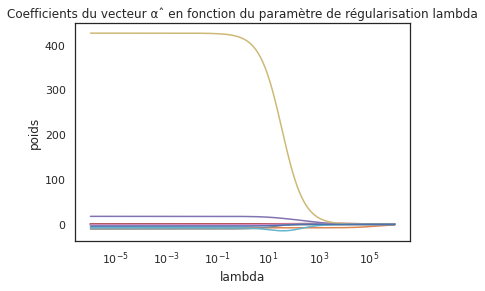

In [97]:
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('poids')
plt.title('Coefficients du vecteur αˆ en fonction du paramètre de régularisation lambda')
plt.axis('tight')
plt.show()

La valeur de alpha diminue les poids de tous les paramètres de la régression. Etudions maintenant la valeur de l'erreur quadratique

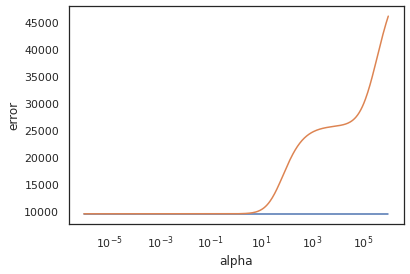

In [26]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

Comme on peut le voir, la régularisation diminue l'erreur sur le jeu de données test. Pour la régression ridge, le minimum semble se trouver vers alpha=10. On peut récupérer la valeur minimum:

In [27]:
min(errors)

[9491.619181932065, 9491.619181932083]

In [28]:
regression = linear_model.Ridge(alpha=10)
regression.fit(X,Y)
print(regression.coef_)
print(regression.intercept_)

[ 0.00000000e+00 -7.74147425e+00  1.75268403e-01  1.35866445e+00
  1.61107998e+01 -7.01916942e-01 -3.45268425e-01 -6.54621106e+00
  3.31970022e+02 -1.16122459e+01 -2.95889519e+00]
-463.61821509623314


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


L’erreur au sens des moindres carrés

In [29]:
b_error = np.mean((regression.predict(X) - Y) ** 2)

print(b_error)

10278.264954539216


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


**Application du Lasso**

In [99]:
n_alphasL = 400
alphasL = np.logspace(-5, 1, n_alphasL)
lasso = linear_model.Lasso(fit_intercept=False)

coefsL = []
errorsL = []
for a in alphasL:
    lasso.set_params(alpha=a)
    lasso.fit(X, Y)
    coefsL.append(lasso.coef_)
    errorsL.append([baseline_error, np.mean((lasso.predict(X) - Y) ** 2)])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.906e+06, tolerance: 1.925e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: 

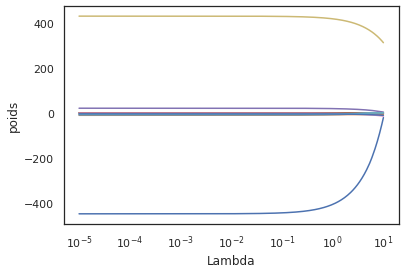

In [100]:
ax = plt.gca()

ax.plot(alphasL, coefsL)
ax.set_xscale('log')
plt.xlabel('Lambda')
plt.ylabel('poids')
plt.axis('tight')
plt.show()

Comme on peut le voir, le lasso permet de supprimer des variables en mettant leur poids à zéro. C'est le cas si deux variables sont corrélées. L'une sera sélectionnée par le Lasso, l'autre supprimée. C'est aussi son avantage par rapport à une régression ridge qui ne fera pas de sélection de variables.

On peut observer maintenant le comportement de l'erreur.

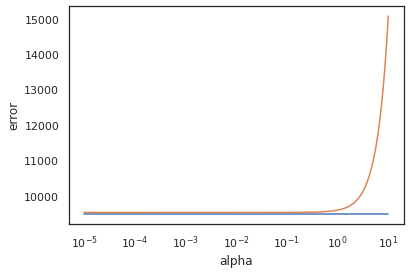

In [101]:
ax = plt.gca()

ax.plot(alphasL, errorsL)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

**EXERCICE2:**

Importation des Librairies

In [102]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

Simulation des données (taille 500) de classification binaire et deux features.

In [103]:
x, y = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class = 2)
y

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [104]:
# verification des tailles
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [105]:
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


On ajoute la colonne unite dans la variable x

In [106]:
z=np.ones(100)
z = z.reshape(100,1)
X=np.append(z,x,axis=1)
X

array([[ 1.        ,  1.12399664,  1.08022131],
       [ 1.        ,  1.42129552,  0.80676603],
       [ 1.        ,  0.94246983, -3.22724728],
       [ 1.        , -0.81676514, -0.60165358],
       [ 1.        , -0.76114713,  1.0322272 ],
       [ 1.        ,  0.64220307,  0.08052478],
       [ 1.        , -1.5239787 ,  1.04479464],
       [ 1.        ,  1.4830117 ,  0.32341445],
       [ 1.        , -1.47715476,  1.39464605],
       [ 1.        , -0.48133278, -0.79322756],
       [ 1.        ,  0.0597885 ,  0.53054448],
       [ 1.        ,  1.16022537,  0.64319518],
       [ 1.        ,  1.48800335,  1.44186596],
       [ 1.        , -0.1297539 ,  0.50095319],
       [ 1.        , -0.09336385,  0.98338926],
       [ 1.        ,  0.47668965,  1.01967904],
       [ 1.        , -0.80929666, -1.84305113],
       [ 1.        ,  0.90476824, -1.32988703],
       [ 1.        , -1.50302962,  1.14599653],
       [ 1.        ,  1.06321617, -1.49562397],
       [ 1.        , -0.12382191,  0.102

In [58]:
#from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure()
#ax = Axes3D(fig)
#ax.scatter(x[0:],x[1:],y)

#plt.show()

**Partitionnement des donnees**

In [107]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=0, stratify=y)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('X_test',y_test.shape)

X_train (80, 3)
X_test (20, 3)
y_train (80, 1)
X_test (20, 1)


**Algorithme de Gradient Descent sur la régression logisitique**

In [108]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [109]:
def model(X,theta):
    return(X.dot(theta))

In [110]:
m,n = X_train.shape
theta = np.zeros(n)
theta = theta.reshape(n,1)
y = y.reshape(-1,1)

In [111]:
def compute_cost(theta,x,y):
  infunc  = -y*(np.log(sigmoid(model(x,theta))))-(1-y)*(np.log(1-sigmoid(model(x,theta))))
  j = np.sum(infunc)/m
  return j

L = compute_cost(theta,X_train,y_train)
print(L)

0.6931471805599453


In [112]:
iterations = 500000
alpha = 0.01

In [113]:
def gradientDescent(x,y,theta,alpha,iterations):
  for _ in range(iterations):
    infunc1 = sigmoid(model(x,theta))-y
    gradient = np.dot(x.transpose(),infunc1)/m
    theta = theta - (alpha/m)*gradient
    return theta

theta = gradientDescent(X_train,y_train,theta,alpha,iterations)
print(theta)

[[ 0.00000000e+00]
 [ 7.08486010e-05]
 [-1.12745918e-05]]


**La prédiction
des données de test**

In [114]:
prediction = model(X_test,theta)
prediction

array([[ 1.04555332e-04],
       [ 1.39064710e-04],
       [-1.09546159e-04],
       [ 7.20197397e-05],
       [ 7.93178018e-05],
       [ 2.49465224e-05],
       [ 1.47788675e-05],
       [-2.51584369e-05],
       [ 5.69753187e-05],
       [-5.10832690e-05],
       [-9.93217751e-05],
       [-1.20378413e-04],
       [-4.49381389e-05],
       [ 5.51580493e-05],
       [ 1.01422938e-04],
       [-1.62052618e-04],
       [-1.83601909e-04],
       [-1.84244320e-05],
       [-1.34620642e-04],
       [ 6.74545354e-05]])

Pour trouver le score

In [116]:
from sklearn import linear_model

modele_regLog = linear_model.LogisticRegression()
#training
modele_regLog.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

On cree un modele finale avec un seuil de precision pour avoir les donnees binaire pour pouvoir utiliser la fonction score()

In [119]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

# On choisit un seuil -1
y_pred = model_final(modele_regLog, X_test, threshold=-1)

In [120]:
#calcule de précision ( le score )
precision = modele_regLog.score(X_test, y_pred)
precision

0.9

Nous avons une precision (score) de 0.9 : un tres bon score

In [17]:
prediction = modele_regLog.predict(X_test)
print('prédiction du modèle:', prediction)


prédiction du modèle: [1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1]


**Ameliorons le score: Cross Validation**

In [121]:
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logistics=linear_model.LogisticRegression()
logistics_cv=GridSearchCV(logistics,grid,cv=10)
logistics_cv.fit(X_train,y_train)

print("Meilleur parametres",logistics_cv.best_params_)
print("Precision :",logistics_cv.best_score_)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Meilleur parametres {'C': 100.0, 'penalty': 'l2'}
Precision : 0.9375


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver 

In [122]:
logreg2=linear_model.LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_pred))

score 0.9


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
